# EXPLORATORY DATA ANALYSIS
### -Data Magician Team-
#### Dataset : datatrain from (https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction)

## Data Import

Dataset yang akan digunakan merupakan dataset dari kaggle yaitu data train Payment Default Prediction Data.

Berikut merupakan penjelasan dari kolom-kolom pada dataset

**ID** : Unique ID of each client <br>
**LIMIT_BAL** : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit<br>
**SEX** : Gender (1=male, 2=female)<br>
**EDUCATION** : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
**MARRIAGE** : Marital status (1=married, 2=single, 3=divorced)<br>
**AGE** : Age of the client<br>
**PAY_0 - PAY_6** : Repayment status in April until September(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
**BILL_AMT 1 - BILL_AMT2** : Amount of bill statement in each month, 2005 (NT dollar)<br>
**PAY_AMT1 - PAY_6** : Amount of previous payment in each month, 2005 (NT dollar)<br>
**default_payment_next_month** : Target Variable: Default payment (1=yes, 0=no)

In [23]:
# Library import
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [24]:
# DATA IMPORT

dftrain = pd.read_csv('train_20D8GL3.csv')
dftrain.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


## Descriptive Statistics

**Apakah ada kolom dengan nama atau tipe data kurang sesuai?**

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

Dapat dilihat bahwa field ID, SEX, EDUCATION, MARRIAGE, AGE, dan PAY_0 hingga PAY_6 memiliki tipe data integer. Walaupun data tersebut berisikan angka (numerik), tetapi jenis field tersebut merupakan data kategorikal yang seharusnya bertipe object. Sebaiknya tipe data tersebut diubah agar tidak terjadi kesalahan processing.

Kolom PAY_0 tidak sesuai namanya, sebaiknya digant dengan PAY_1 untuk menghindari kesalahan dalam memahami data.

In [ ]:
# Rename PAY_0 column
dftrain.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

In [ ]:
# Transforming data type

for i in ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  dftrain[i] = dftrain[i].astype('object')

In [ ]:
dftrain[['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         21000 non-null  object
 1   SEX        21000 non-null  object
 2   EDUCATION  21000 non-null  object
 3   MARRIAGE   21000 non-null  object
 4   PAY_1      21000 non-null  object
 5   PAY_2      21000 non-null  object
 6   PAY_3      21000 non-null  object
 7   PAY_4      21000 non-null  object
 8   PAY_5      21000 non-null  object
 9   PAY_6      21000 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


Kolom ID, SEX, EDUCATION, MARRIAGE, AGE, dan PAY_1 hingga PAY_6 telah disesuaikan data typenya.

** Apakah terdapat data duplikasi dan missing data?**

In [ ]:
# Check the missing data
if dftrain.isnull().sum().sum() == 0: print('Tidak ada missing data')
else : print(f'Terdapat data duplikat sebesar{dftrain.isnull().sum()}')

Tidak ada missing data


In [ ]:
# Check the duplicated data
if dftrain.duplicated().sum() == 0: print('Tidak ada data duplikat')
else : print(f'Terdapat data duplikat sebesar{dftrain.duplicated().sum()}')

Tidak ada data duplikat


**Bagaimana deskripsi statistik singkat dari dataset?**

In [ ]:
# Descriptive Statistics
numerical_vars = ['LIMIT_BAL', 'AGE']
dftrain[numerical_vars].describe()

,LIMIT_BAL,AGE
count,21000.000000,21000.000000
mean,167214.746667,35.461619
std,128965.188482,9.206628
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,75.000000


Jumlah limit kredit yang diberikan pada nasabah (LIMIT_BAL), dan umur nasabah memiliki nilai mean yang lebih besar daripada median dari keseluruhan data, hal ini mengindikasikan bahwa data berdistribusi *positively skewed*. Selanjutnya perlu dilihat distribusi data dengan melihat visualisasinya.

In [ ]:
bill_vars = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
dftrain[bill_vars].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000
mean,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000
std,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234
min,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000
50%,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000
75%,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000
max,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000


Terdapat nilai tagihan nasabah yang **bernilai negatif**, untuk selanjutnya perlu dicek apakah data perlu dilakukan penanganan khusus.

In [ ]:
# Check if feature's distribution is positively skewed 
for i in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
  if dftrain[i].mean() > dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi positively skewed')
  elif dftrain[i].mean() < dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi negatively skewed')
  else : print('Cek ulang data')

BILL_AMT1 memiliki kemungkinan berdistribusi positively skewed
BILL_AMT2 memiliki kemungkinan berdistribusi positively skewed
BILL_AMT3 memiliki kemungkinan berdistribusi positively skewed
BILL_AMT4 memiliki kemungkinan berdistribusi positively skewed
BILL_AMT5 memiliki kemungkinan berdistribusi positively skewed
BILL_AMT6 memiliki kemungkinan berdistribusi positively skewed


Diketahui jumlah tagihan nasabah pada bulan April hingga September memiliki nilai mean lebih besar dibandingkan median dari keseluruhan data, sehingga memiliki kemungkinan untuk berdistribusi *positively skewed*.

In [ ]:
pay_vars = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
dftrain[pay_vars].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


In [ ]:
# Check if feature's distribution is positively skewed 
for i in ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
  if dftrain[i].mean() > dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi positively skewed')
  elif dftrain[i].mean() < dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi negatively skewed')
  else : print('Cek ulang data')

PAY_AMT1 memiliki kemungkinan berdistribusi positively skewed
PAY_AMT2 memiliki kemungkinan berdistribusi positively skewed
PAY_AMT3 memiliki kemungkinan berdistribusi positively skewed
PAY_AMT4 memiliki kemungkinan berdistribusi positively skewed
PAY_AMT5 memiliki kemungkinan berdistribusi positively skewed
PAY_AMT6 memiliki kemungkinan berdistribusi positively skewed


Diketahui jumlah pembayaran nasabah pada bulan April hingga September memiliki nilai mean lebih besar dibandingkan median dari keseluruhan data, sehingga memiliki kemungkinan untuk berdistribusi positively skewed.

## Univariate Analysis

**Berapa banyak nasabah yang berada pada data train?**

In [ ]:
print('Terdapat sebanyak ',dftrain['ID'].nunique(), ' nasabah pada data train')

Terdapat sebanyak  21000  nasabah pada data train


**Berapa persentase nasabah yang mengalami kegagalan bayar pada bulan Oktober?**

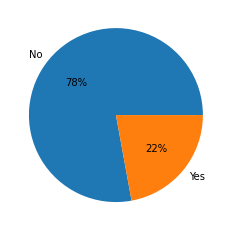

In [ ]:
default_payment_next_month_count = dftrain.replace({1:'Yes', 0:'No'})
default_payment_next_month_count = default_payment_next_month_count.groupby('default_payment_next_month').agg(count = ('ID', 'nunique')).reset_index()
plt.pie(default_payment_next_month_count['count'], labels = default_payment_next_month_count['default_payment_next_month'], autopct='%.0f%%')
plt.show()

Terdapat 22% nasabah yang mengalami payment default pada bulan Oktober.

**Bagaimana distribusi gender pada nasabah?**

In [26]:
datacopy = dftrain.copy()
datacopy['SEX'] = datacopy['SEX'].replace({1:'male', 2:'female'})
datacopy['default_payment_next_month'] = datacopy['default_payment_next_month'].replace({1:'Yes', 0:'No'})
sex_count = datacopy.groupby(['SEX', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
sex_count['default rate by gender']= ['-', sex_count['count'][1]/(sex_count['count'][0]+sex_count['count'][1]), '-', sex_count['count'][3]/(sex_count['count'][2]+sex_count['count'][3])]
sex_count

,SEX,default_payment_next_month,count,default rate by gender
0,female,No,10097,-
1,female,Yes,2662,0.208637
2,male,No,6258,-
3,male,Yes,1983,0.240626


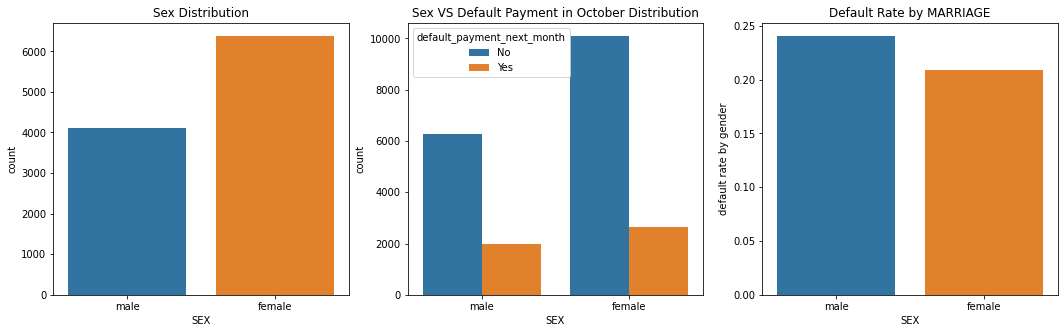

In [ ]:
sex_plot, axes = plt.subplots(ncols=3, figsize=(18, 5))

sns.barplot(x = 'SEX', y = 'count', data = sex_count, errorbar=None, ax = axes[0])
axes[0].set_title('Sex Distribution')

sns.barplot(x = 'SEX', y = 'count', hue = 'default_payment_next_month', data = sex_count, ax = axes[1])
axes[1].set_title('Sex VS Default Payment in October Distribution')

sns.barplot(x = sex_count['SEX'], y = sex_count['default rate by gender'][[1,3]], ax = axes[2])
axes[2].set_title('Default Rate by MARRIAGE')

sex_plot.subplots_adjust(wspace=0.2)


Terdapat lebih banyak nasabah perempuan dibandingkan dengan nasabah lak-laki. Baik nasabah perempuan maupun laki laki, lebih banyak yang berhasil bayar pada bulan Oktober. 

Data menunjukkan bahwa default rate nasabah perempuan lebih kecil dibanding dengan default rate nasabah laki-laki.

**Bagaimana distribusi pendidikan nasabah?**

In [27]:
datacopy['EDUCATION'] = datacopy['EDUCATION'].replace({1 : '1 (graduate school)', 2 : '2 (university)', 3 : '3 (high school)', 4 : '4 (others)', 5 : '5 (unknown)', 6 : '6 (unknown)'})
edu_count = datacopy.groupby(['EDUCATION', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
edu_count.sort_values(['default_payment_next_month', 'count'], ascending = False)

,EDUCATION,default_payment_next_month,count
4,2 (university),Yes,2345
2,1 (graduate school),Yes,1433
6,3 (high school),Yes,849
10,5 (unknown),Yes,10
8,4 (others),Yes,4
12,6 (unknown),Yes,4
3,2 (university),No,7444
1,1 (graduate school),No,5982
5,3 (high school),No,2618
9,5 (unknown),No,190


<Axes: title={'center': 'Education Distribution'}, xlabel='EDUCATION', ylabel='count'>

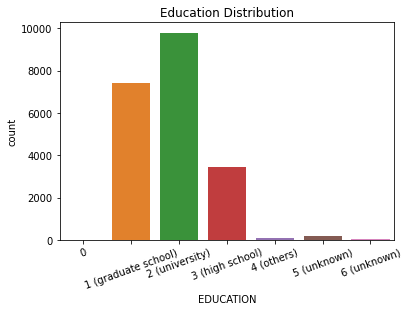

In [ ]:
edu_plot = sns.barplot(x = 'EDUCATION', y = 'count', data = edu_count)
edu_plot.set_title('Education Distribution')
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=20)
edu_plot

Nasabah paling banyak merupakan lulusan universitas sebesar 46%, dan diikuti oleh lulusan high school dengan sebesar 35%.

Dalam dataset ini masih ada data dengan nilai yang tidak sesuai, terdapat data yang bernilai 0, dimana nilai tersebut tidak terdefinisikan sebagai suatu kategori pendidikan nasabah. Perlu dilakukan follow up apakah nilai 0 ini merupakan data salah, atau memiliki artian lain.

Terdapat dua kategori yang memiliki arti '*unknown*' yaitu data bernilai 5 dan 6, sehingga perlu dipastikan kembali apakah dua kategori tersebut memiliki artian sama atau berbeda.

**Bagaimana distribusi dari marriage status nasabah?**

In [79]:
datacopy['MARRIAGE']= datacopy['MARRIAGE'].replace({1 : 'married', 2 : 'single', 3 : 'divorced'})
marriage_count = datacopy.groupby(['MARRIAGE', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
x = marriage_count['count']
marriage_count['def rate by marriage'] = ['-', x[1]/(x[0]+x[1]), '-', x[3]/(x[2]+x[3]), '-', x[5]/(x[4]+x[5]), '-', x[7]/(x[6]+x[7])]
marriage_count

,MARRIAGE,default_payment_next_month,count,def rate by marriage
0,0,No,34,-
1,0,Yes,2,0.055556
2,divorced,No,156,-
3,divorced,Yes,63,0.287671
4,married,No,7343,-
5,married,Yes,2218,0.231984
6,single,No,8822,-
7,single,Yes,2362,0.211195


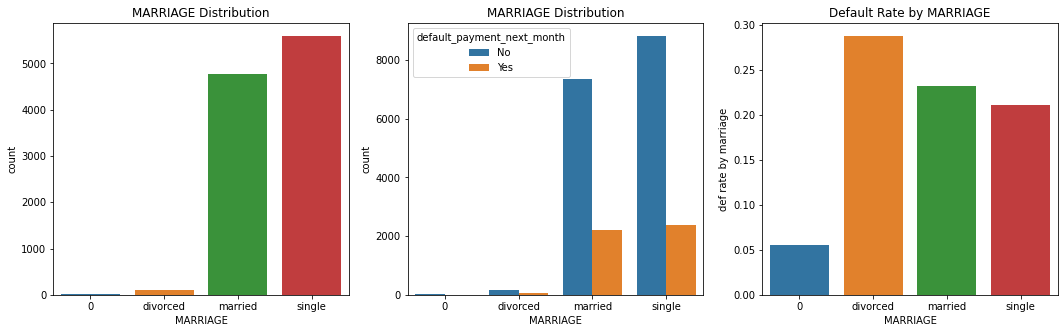

In [ ]:
marriage_plot, axes = plt.subplots(ncols=3, figsize=(18, 5))

sns.barplot(x = 'MARRIAGE', y = 'count', data = marriage_count, ax = axes[0], errorbar = None)
axes[0].set_title('MARRIAGE Distribution')

sns.barplot(x = 'MARRIAGE', y = 'count', hue = 'default_payment_next_month', data = marriage_count, ax = axes[1])
axes[1].set_title('MARRIAGE Distribution')

sns.barplot(x = marriage_count['MARRIAGE'], y = marriage_count['def rate by marriage'][[1,3,5,7]], ax = axes[2])
axes[2].set_title('Default Rate by MARRIAGE')

marriage_plot.subplots_adjust(wspace=0.2)

Diketahui bahwa masih terdapat data dengan nilai yang tidak sesuai dengan kategori yang telah ditentukan, yaitu data yang bernilai 0. Sehingga perlu kembali dilakukan follow up apakah nilai tersebut ada karena kesalahan input atau memiliki artian lain.

Dari dataset, diketahui bahwa nasabah paling banyak berstatus single, dan nasabah dengan default rate paling tinggi adalah nasabah yang telah bercerai.

**Bagaimana distribusi umur nasabah?**

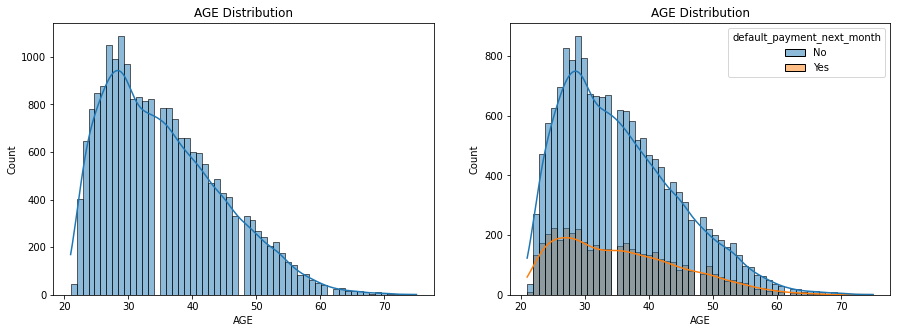

In [ ]:
age_plot, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.histplot(datacopy['AGE'], kde = True, ax = axs[0])
axs[0].set_title('AGE Distribution')

sns.histplot(datacopy, x='AGE', hue='default_payment_next_month', kde = True, ax = axs[1])
axs[1].set_title('AGE Distribution')

age_plot.subplots_adjust(wspace=0.2)


Untuk keseluruhan nasabah berdistribusi positively skewed, dan paling banyak berada pada range antara 25-30 tahun. Nasabah yang memiliki potensi untuk gagal bayar berada pada range 25-30.

Untuk mempermudah interpretasi data, nasabah akan dikelompokkan kembali sesuai range usia.

In [ ]:
list1 = []
for index, row in dftrain.iterrows():
  if row['AGE'] < 25 :
    list1.append('Young (<25)')
  elif row['AGE'] >= 25 and row['AGE'] < 40:
    list1.append('Adult')
  elif row['AGE'] >= 40 and row['AGE'] < 60:
    list1.append('Middle Aged')
  else :
    list1.append('Old (>60)')

datacopy['SEGMENT'] = list1
age_segmentation = datacopy.groupby(['SEGMENT', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
age_segmentation

,SEGMENT,default_payment_next_month,count
0,Adult,No,10125
1,Adult,Yes,2628
2,Middle Aged,No,4694
3,Middle Aged,Yes,1440
4,Old (>60),No,179
5,Old (>60),Yes,60
6,Young (<25),No,1357
7,Young (<25),Yes,517


Text(0.5, 1.0, 'Age Segmentation Distribution')

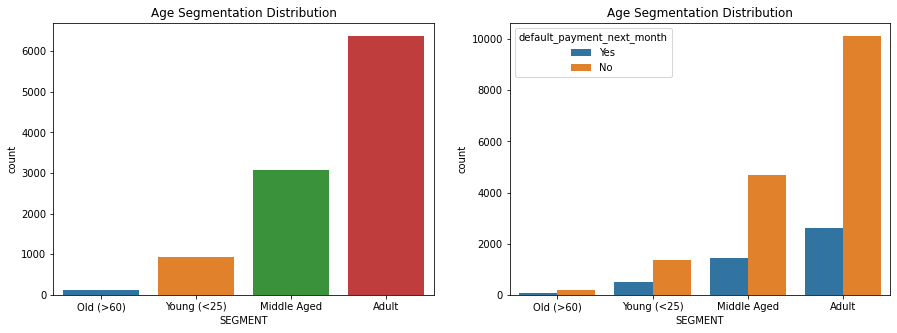

In [ ]:
age_segmentation_plot, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(x = 'SEGMENT', y = 'count', data = age_segmentation.sort_values('count'), errorbar = None, ax = axs[0])
axs[0].set_title('Age Segmentation Distribution')

sns.barplot(x = 'SEGMENT', y = 'count', data = age_segmentation.sort_values('count'), hue = 'default_payment_next_month', ax = axs[1])
axs[1].set_title('Age Segmentation Distribution')

Nasabah paling banyak berada pada segmen usia Dewasa (25-40 tahun), dan segment usia adult ini juga memiliki nasabah yang gagal bayar pada bulan Oktober paling banyak dibandingkan dengan segmen usia lainnya.

**Bagaimana distribusi dari limit kartu kredit nasabah?**

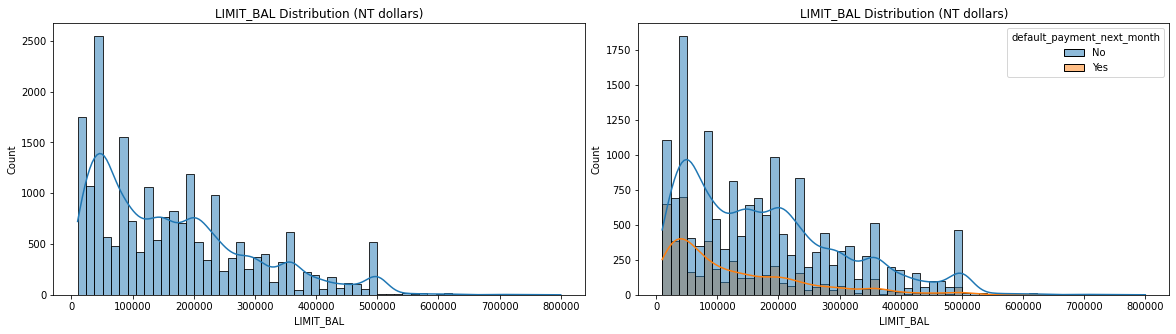

In [ ]:
limit_bal_plot, axs = plt.subplots(ncols=2, figsize=(20, 5))

sns.histplot(datacopy['LIMIT_BAL'], kde = True, ax = axs[0])
axs[0].set_title('LIMIT_BAL Distribution (NT dollars)')

sns.histplot(datacopy, x = 'LIMIT_BAL',hue='default_payment_next_month', kde = True, ax = axs[1])
axs[1].set_title('LIMIT_BAL Distribution (NT dollars)')

limit_bal_plot.subplots_adjust(wspace=0.1)

Feature limit kartu kredit nasabah memiliki distribusi positively skewed. Secara keseluruhan nasabah memiliki limit kartu kredit di bawah NTD 100.000. Begitu juga dengan nasabah yang mengalami gagal bayar pada bulan Oktober banyak yang berada pada limit di bawah NTD 100.000 

**Bagaimana distribusi dari Repayment status nasabah tiap bulannya?**

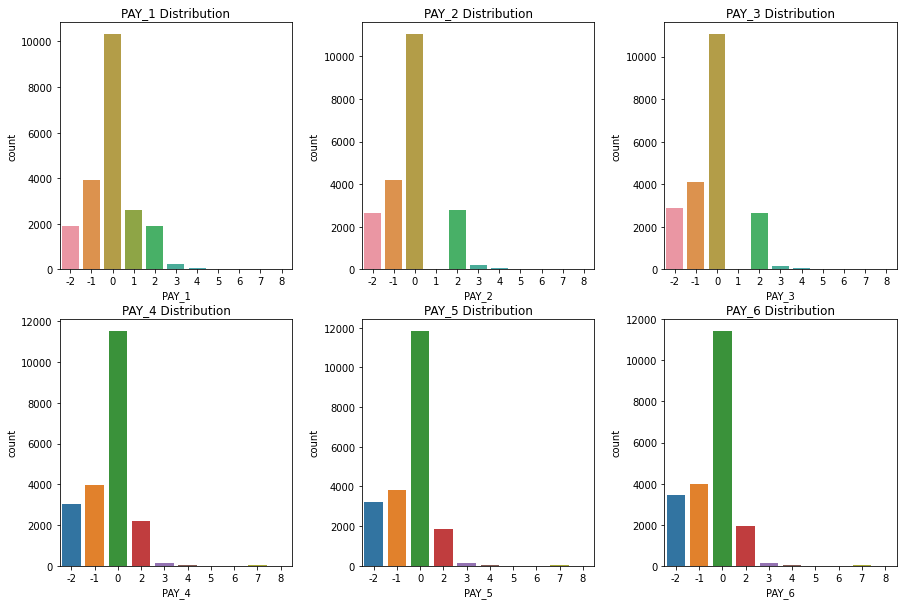

In [ ]:
repayment_status_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 10))

repayment_status_1_count = datacopy.groupby('PAY_1').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_1', y = 'count', data = repayment_status_1_count, ax = axes[0,0])
axes[0,0].set_title('PAY_1 Distribution')

repayment_status_2_count = datacopy.groupby('PAY_2').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_2', y = 'count', data = repayment_status_2_count, ax = axes[0,1])
axes[0,1].set_title('PAY_2 Distribution')

repayment_status_3_count = datacopy.groupby('PAY_3').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_3', y = 'count', data = repayment_status_3_count, ax = axes[0,2])
axes[0,2].set_title('PAY_3 Distribution')

repayment_status_4_count = datacopy.groupby('PAY_4').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_4', y = 'count', data = repayment_status_4_count, ax = axes[1,0])
axes[1,0].set_title('PAY_4 Distribution')

repayment_status_5_count = datacopy.groupby('PAY_5').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_5', y = 'count', data = repayment_status_5_count, ax = axes[1,1])
axes[1,1].set_title('PAY_5 Distribution')

repayment_status_6_count = datacopy.groupby('PAY_6').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_6', y = 'count', data = repayment_status_6_count, ax = axes[1,2])
axes[1,2].set_title('PAY_6 Distribution')

repayment_status_plot.subplots_adjust(wspace=0.3, hspace = 0.2)

**Bagaimana distribusi tagihan/bill kartu kredit dari nasabah tiap bulannya?**

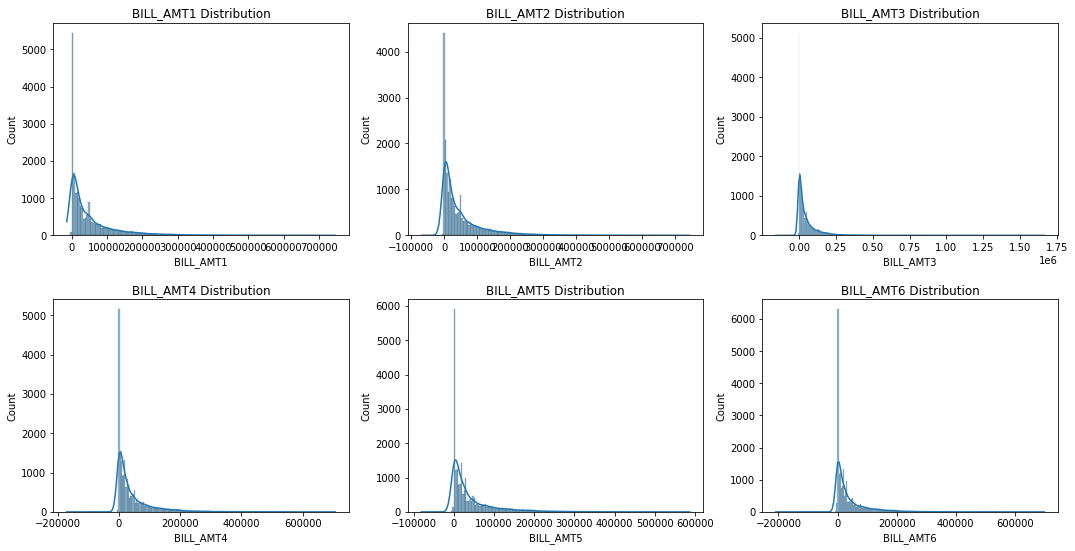

In [ ]:
# BILL Distribution
bill_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.histplot(dftrain['BILL_AMT1'], kde = True, ax = axs[0,0])
axs[0,0].set_title('BILL_AMT1 Distribution')
sns.histplot(dftrain['BILL_AMT2'], kde = True, ax = axs[0,1])
axs[0,1].set_title('BILL_AMT2 Distribution')
sns.histplot(dftrain['BILL_AMT3'], kde = True, ax = axs[0,2])
axs[0,2].set_title('BILL_AMT3 Distribution')
sns.histplot(dftrain['BILL_AMT4'], kde = True, ax = axs[1,0])
axs[1,0].set_title('BILL_AMT4 Distribution')
sns.histplot(dftrain['BILL_AMT5'], kde = True, ax = axs[1,1])
axs[1,1].set_title('BILL_AMT5 Distribution')
sns.histplot(dftrain['BILL_AMT6'], kde = True, ax = axs[1,2])
axs[1,2].set_title('BILL_AMT6 Distribution')

bill_plot.subplots_adjust(hspace=0.3)

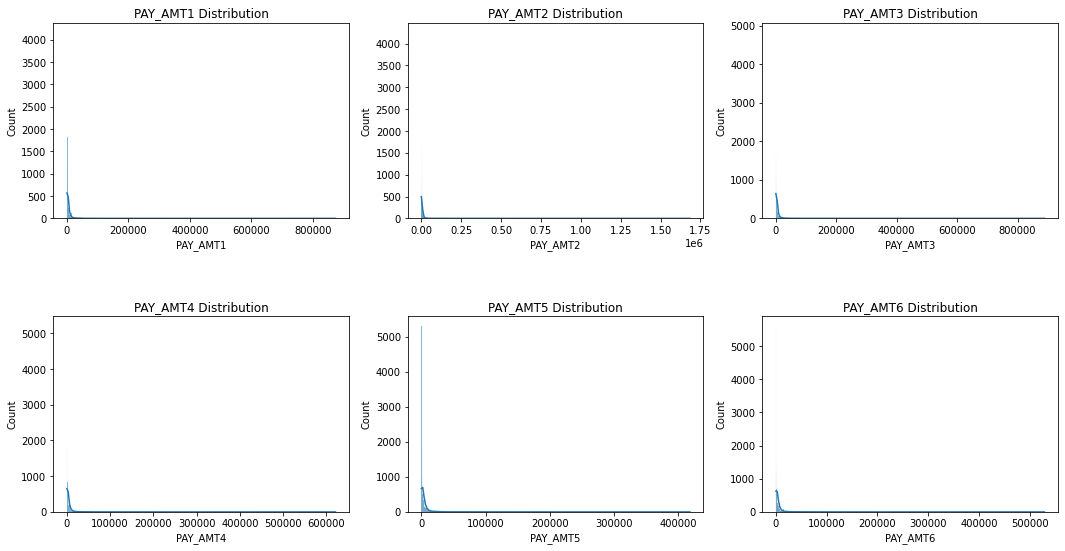

In [ ]:
# PAY Distribution
pay_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.histplot(dftrain['PAY_AMT1'], kde = True, ax = axs[0,0])
axs[0,0].set_title('PAY_AMT1 Distribution')
sns.histplot(dftrain['PAY_AMT2'], kde = True, ax = axs[0,1])
axs[0,1].set_title('PAY_AMT2 Distribution')
sns.histplot(dftrain['PAY_AMT3'], kde = True, ax = axs[0,2])
axs[0,2].set_title('PAY_AMT3 Distribution')
sns.histplot(dftrain['PAY_AMT4'], kde = True, ax = axs[1,0])
axs[1,0].set_title('PAY_AMT4 Distribution')
sns.histplot(dftrain['PAY_AMT5'], kde = True, ax = axs[1,1])
axs[1,1].set_title('PAY_AMT5 Distribution')
sns.histplot(dftrain['PAY_AMT6'], kde = True, ax = axs[1,2])
axs[1,2].set_title('PAY_AMT6 Distribution')

pay_plot.subplots_adjust(hspace=0.5)

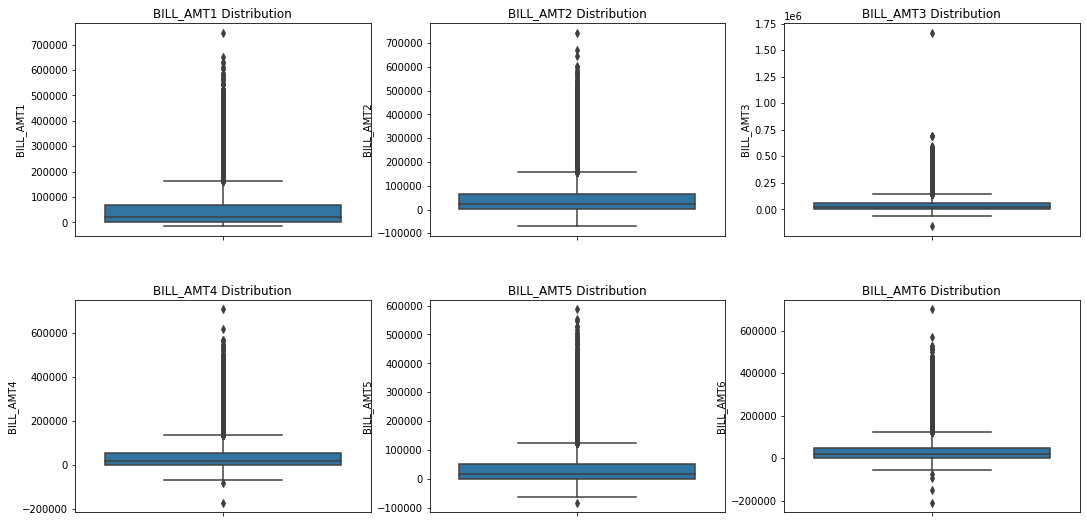

In [ ]:
# BILL BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = dftrain['BILL_AMT1'], ax = axs[0,0])
axs[0,0].set_title('BILL_AMT1 Distribution')
sns.boxplot(y = dftrain['BILL_AMT2'], ax = axs[0,1])
axs[0,1].set_title('BILL_AMT2 Distribution')
sns.boxplot(y = dftrain['BILL_AMT3'], ax = axs[0,2])
axs[0,2].set_title('BILL_AMT3 Distribution')
sns.boxplot(y = dftrain['BILL_AMT4'], ax = axs[1,0])
axs[1,0].set_title('BILL_AMT4 Distribution')
sns.boxplot(y = dftrain['BILL_AMT5'], ax = axs[1,1])
axs[1,1].set_title('BILL_AMT5 Distribution')
sns.boxplot(y = dftrain['BILL_AMT6'], ax = axs[1,2])
axs[1,2].set_title('BILL_AMT6 Distribution')

pay_boxplot.subplots_adjust(hspace=0.3)

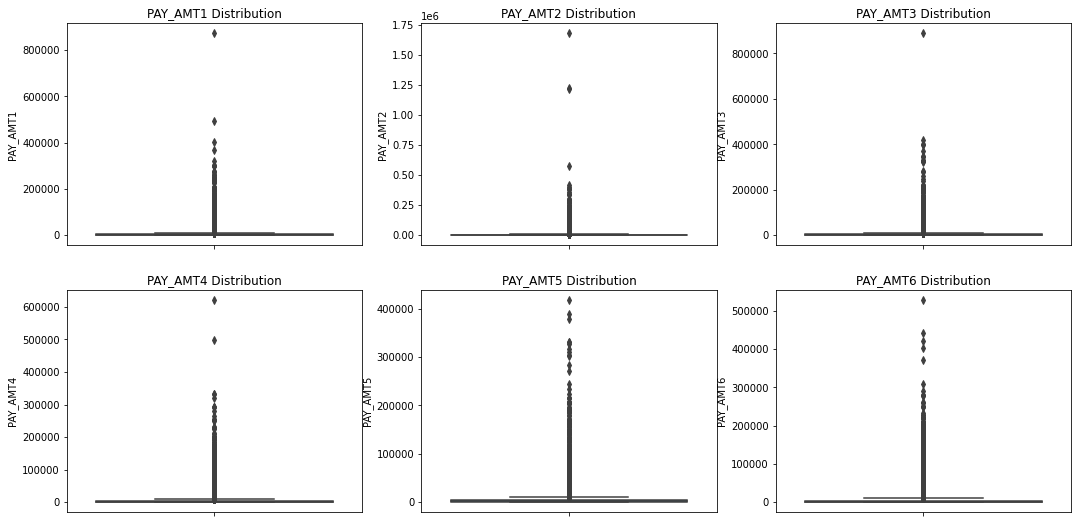

In [ ]:
# PAY BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = dftrain['PAY_AMT1'], ax = axs[0,0])
axs[0,0].set_title('PAY_AMT1 Distribution')
sns.boxplot(y = dftrain['PAY_AMT2'], ax = axs[0,1])
axs[0,1].set_title('PAY_AMT2 Distribution')
sns.boxplot(y = dftrain['PAY_AMT3'], ax = axs[0,2])
axs[0,2].set_title('PAY_AMT3 Distribution')
sns.boxplot(y = dftrain['PAY_AMT4'], ax = axs[1,0])
axs[1,0].set_title('PAY_AMT4 Distribution')
sns.boxplot(y = dftrain['PAY_AMT5'], ax = axs[1,1])
axs[1,1].set_title('PAY_AMT5 Distribution')
sns.boxplot(y = dftrain['PAY_AMT6'], ax = axs[1,2])
axs[1,2].set_title('PAY_AMT6 Distribution')

pay_boxplot.subplots_adjust(hspace=0.2)

**Apakah nasabah berhasil melakukan pembayaran tagihan tiap bulannya?**

In [36]:
# Check Client payment status
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []

for index, row in dftrain.iterrows():
  if row['PAY_AMT1'] >= row['BILL_AMT1'] : 
    list1.append('Yes')
  else :
    list1.append('No')
datacopy['PAYMENT_1'] = list1

for index, row in dftrain.iterrows():
  if row['PAY_AMT2'] >= row['BILL_AMT2'] : 
    list2.append('Yes')
  else :
    list2.append('No')
datacopy['PAYMENT_2'] = list2

for index, row in dftrain.iterrows():
  if row['PAY_AMT3'] >= row['BILL_AMT3'] : 
    list3.append('Yes')
  else :
    list3.append('No')
datacopy['PAYMENT_3'] = list3

for index, row in dftrain.iterrows():
  if row['PAY_AMT4'] >= row['BILL_AMT4'] : 
    list4.append('Yes')
  else :
    list4.append('No')
datacopy['PAYMENT_4'] = list4

for index, row in dftrain.iterrows():
  if row['PAY_AMT5'] >= row['BILL_AMT5'] : 
    list5.append('Yes')
  else :
    list5.append('No')
datacopy['PAYMENT_5'] = list5

for index, row in dftrain.iterrows():
  if row['PAY_AMT6'] >= row['BILL_AMT6'] : 
    list6.append('Yes')
  else :
    list6.append('No')
datacopy['PAYMENT_6'] = list6

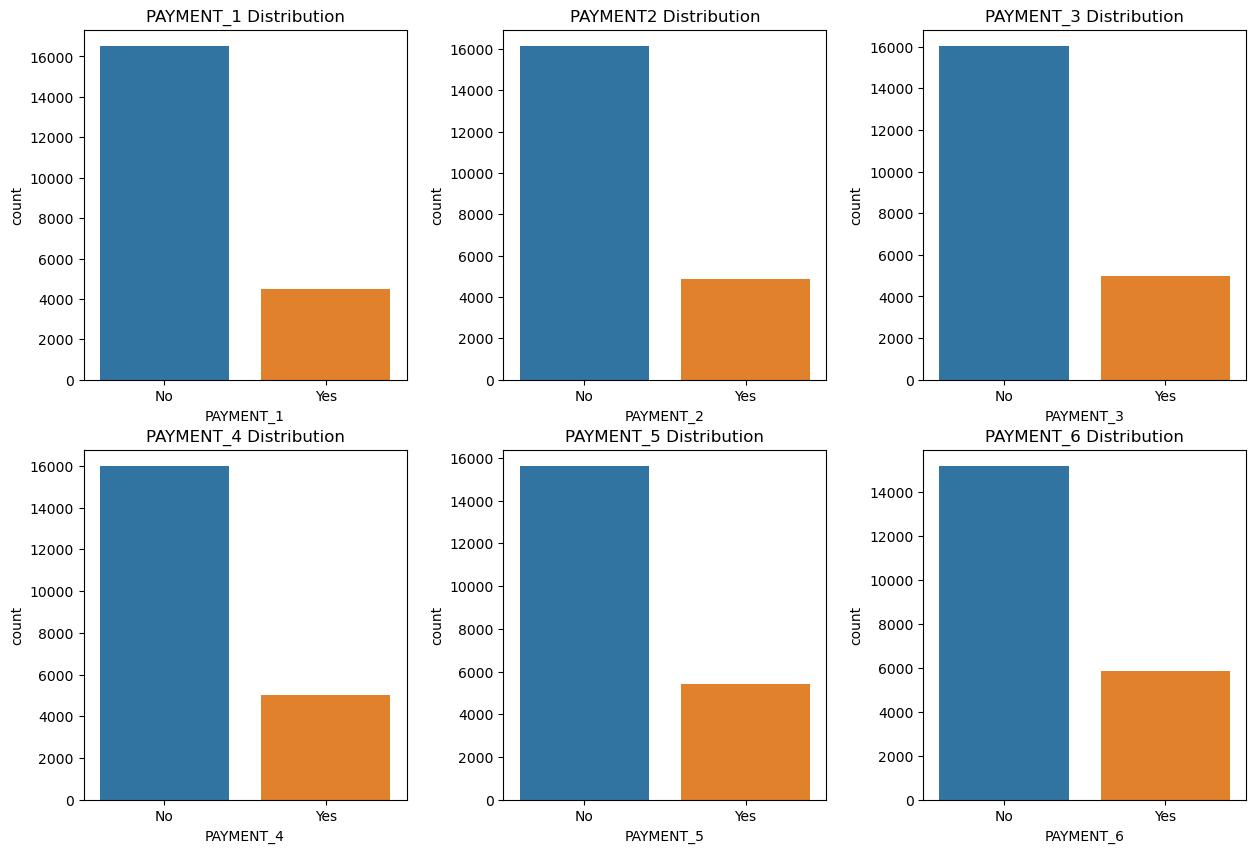

In [37]:
payment_default_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 10))

PAYMENT_1_count = datacopy.groupby(['PAYMENT_1']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_1', y = 'count', data = PAYMENT_1_count, ax = axes[0,0])
axes[0,0].set_title('PAYMENT_1 Distribution')

PAYMENT_2_count = datacopy.groupby(['PAYMENT_2']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_2', y = 'count', data = PAYMENT_2_count, ax = axes[0,1])
axes[0,1].set_title('PAYMENT2 Distribution')

PAYMENT_3_count = datacopy.groupby(['PAYMENT_3']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_3', y = 'count', data = PAYMENT_3_count, ax = axes[0,2])
axes[0,2].set_title('PAYMENT_3 Distribution')

PAYMENT_4_count = datacopy.groupby(['PAYMENT_4']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_4', y = 'count', data = PAYMENT_4_count, ax = axes[1,0])
axes[1,0].set_title('PAYMENT_4 Distribution')

PAYMENT_5_count = datacopy.groupby(['PAYMENT_5']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_5', y = 'count', data = PAYMENT_5_count, ax = axes[1,1])
axes[1,1].set_title('PAYMENT_5 Distribution')

PAYMENT_6_count = datacopy.groupby(['PAYMENT_6']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_6', y = 'count', data = PAYMENT_6_count, ax = axes[1,2])
axes[1,2].set_title('PAYMENT_6 Distribution')

payment_default_plot.subplots_adjust(wspace=0.3, hspace = 0.2)

##  Multivariate Analysis

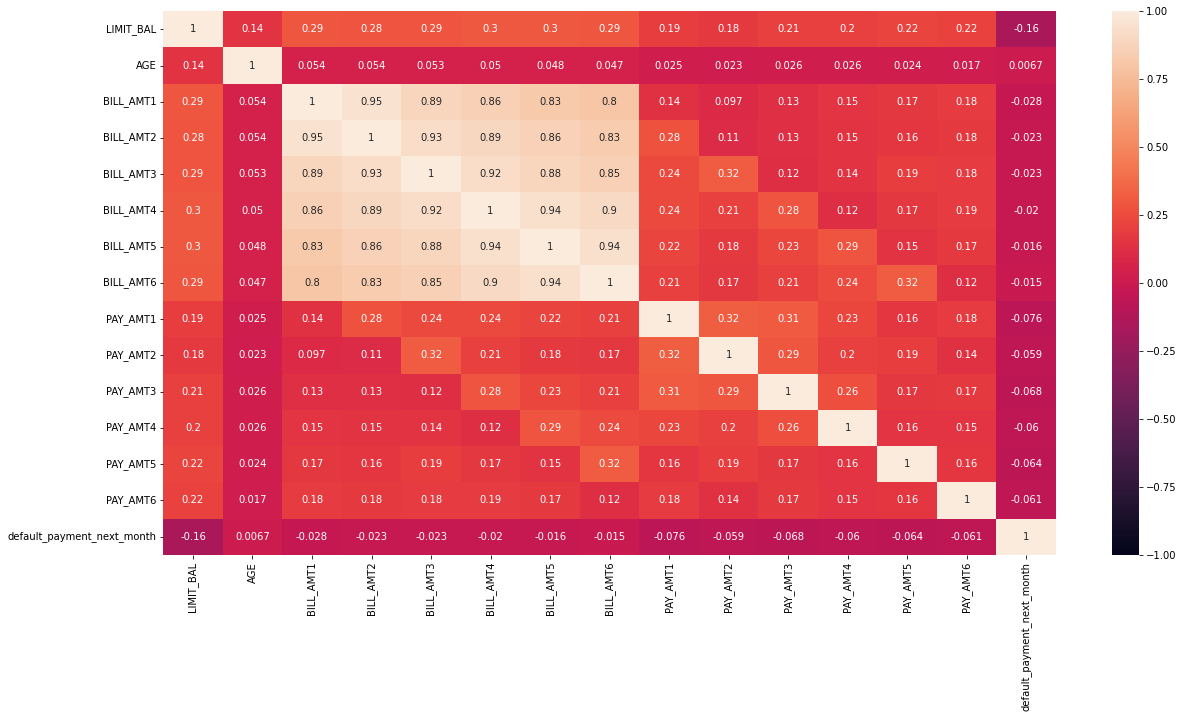

In [ ]:
dat_corr = dftrain.drop(['ID', 'EDUCATION', 'MARRIAGE', 'SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)
corr = datcopy.corr()

plt.figure(figsize = (20,10))
sns.heatmap(corr, vmin=-1, vmax=1,annot=True)
plt.show()

Pengertian Koefisien Korelasi
0 : Tidak ada korelasi antara dua variabel.
> 0 – 0,25 : Korelasi sangat lemah.
> 0,25 – 0,5 : Korelasi cukup.
> 0,5 – 0,75 : Korelasi kuat.
> 0,75 – 0,99 : Korelasi sangat kuat.
1 : Korelasi hubungan sempurna positif.
-1 : Korelasi hubungan sempurna negatif.


In [ ]:
# Karena nilai koef r dari data target terhadap beberapa feature < o,25, maka hubungan / korelasi linier tidak dapat digunakan

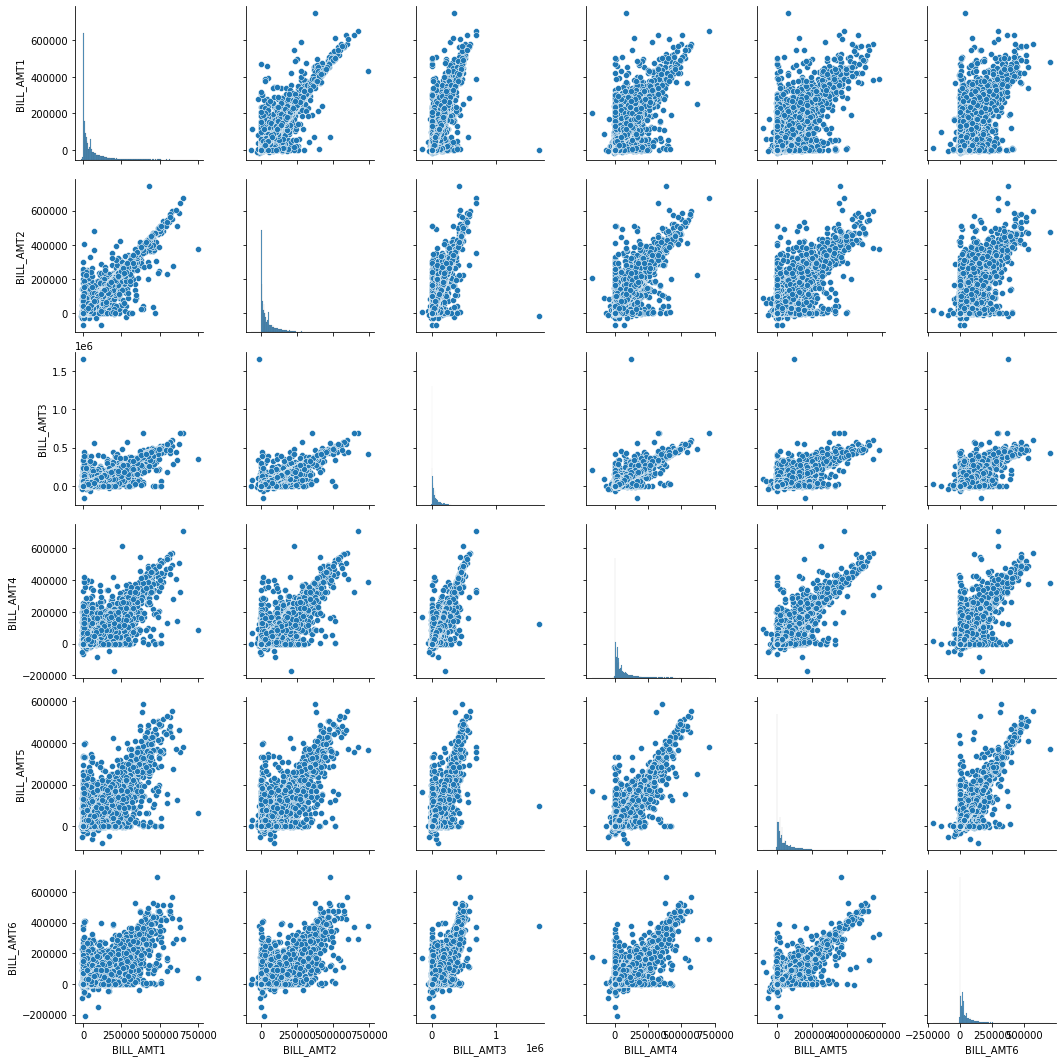

In [ ]:
sns.pairplot(dftrain[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])

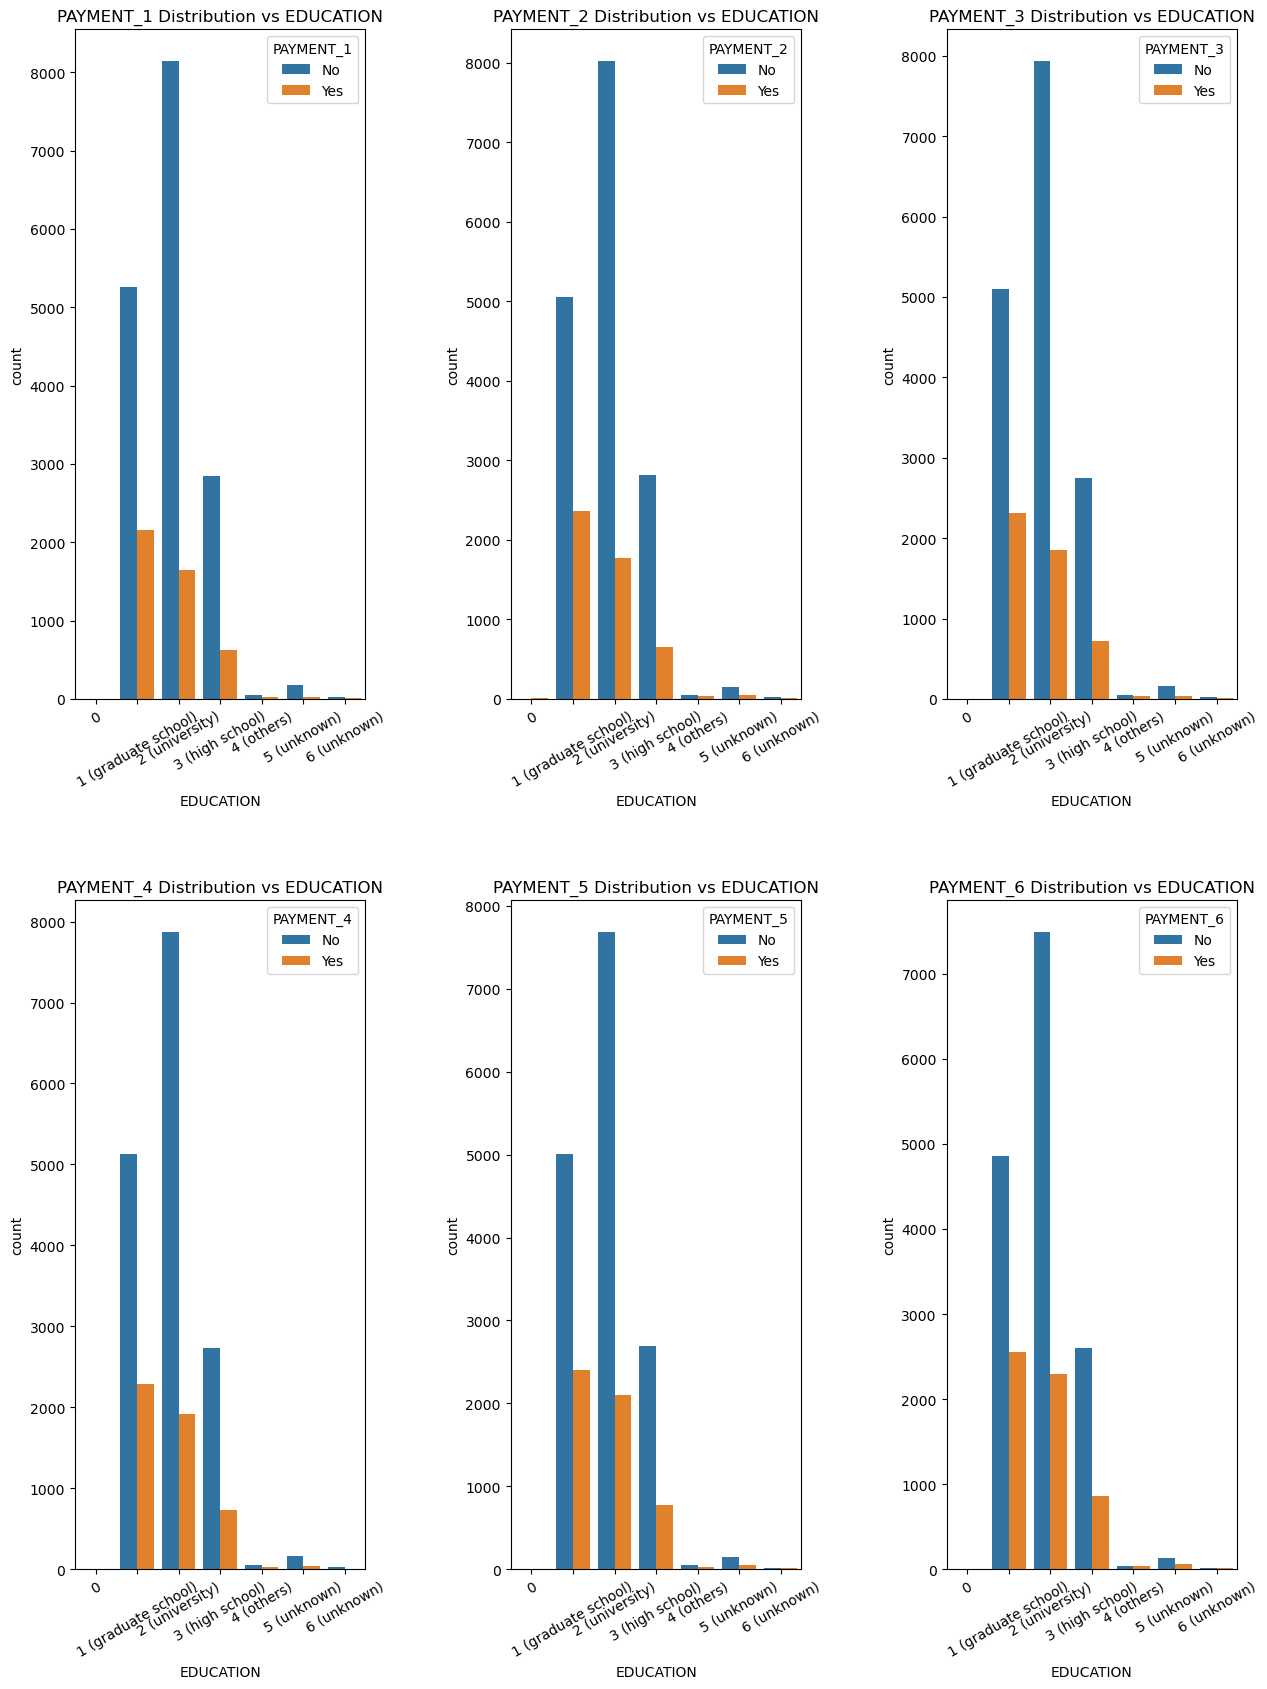

In [73]:
payment_default_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 20))

PAYMENT_1_count = datacopy.groupby(['PAYMENT_1','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_1_count, ax = axes[0,0], hue = 'PAYMENT_1')
axes[0,0].set_title('PAYMENT_1 Distribution vs EDUCATION')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=30)

PAYMENT_2_count = datacopy.groupby(['PAYMENT_2','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_2_count, ax = axes[0,1], hue = 'PAYMENT_2')
axes[0,1].set_title('PAYMENT_2 Distribution vs EDUCATION')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=30)

PAYMENT_3_count = datacopy.groupby(['PAYMENT_3','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_3_count, ax = axes[0,2], hue = 'PAYMENT_3')
axes[0,2].set_title('PAYMENT_3 Distribution vs EDUCATION')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(),rotation=30)

PAYMENT_4_count = datacopy.groupby(['PAYMENT_4','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_4_count, ax = axes[1,0], hue = 'PAYMENT_4')
axes[1,0].set_title('PAYMENT_4 Distribution vs EDUCATION')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=30)

PAYMENT_5_count = datacopy.groupby(['PAYMENT_5','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_5_count, ax = axes[1,1], hue = 'PAYMENT_5')
axes[1,1].set_title('PAYMENT_5 Distribution vs EDUCATION')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=30)

PAYMENT_6_count = datacopy.groupby(['PAYMENT_6','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_6_count, ax = axes[1,2], hue = 'PAYMENT_6')
axes[1,2].set_title('PAYMENT_6 Distribution vs EDUCATION')
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(),rotation=30)

payment_default_plot.subplots_adjust(wspace=0.5, hspace = 0.3)

##### feature PAYMENT_ adalah kolom pernyataan user dapat membayar tagihan pada bulan tertentu dengan jumlah lebih dari tagihan yang seharusnya.
##### Dari data grafik di atas, user dengan kelas university merupakan jumlah user terbanyak, tetapi banyak user tersebut yang tidak bisa membayar dengan jumlah yang seharusnya

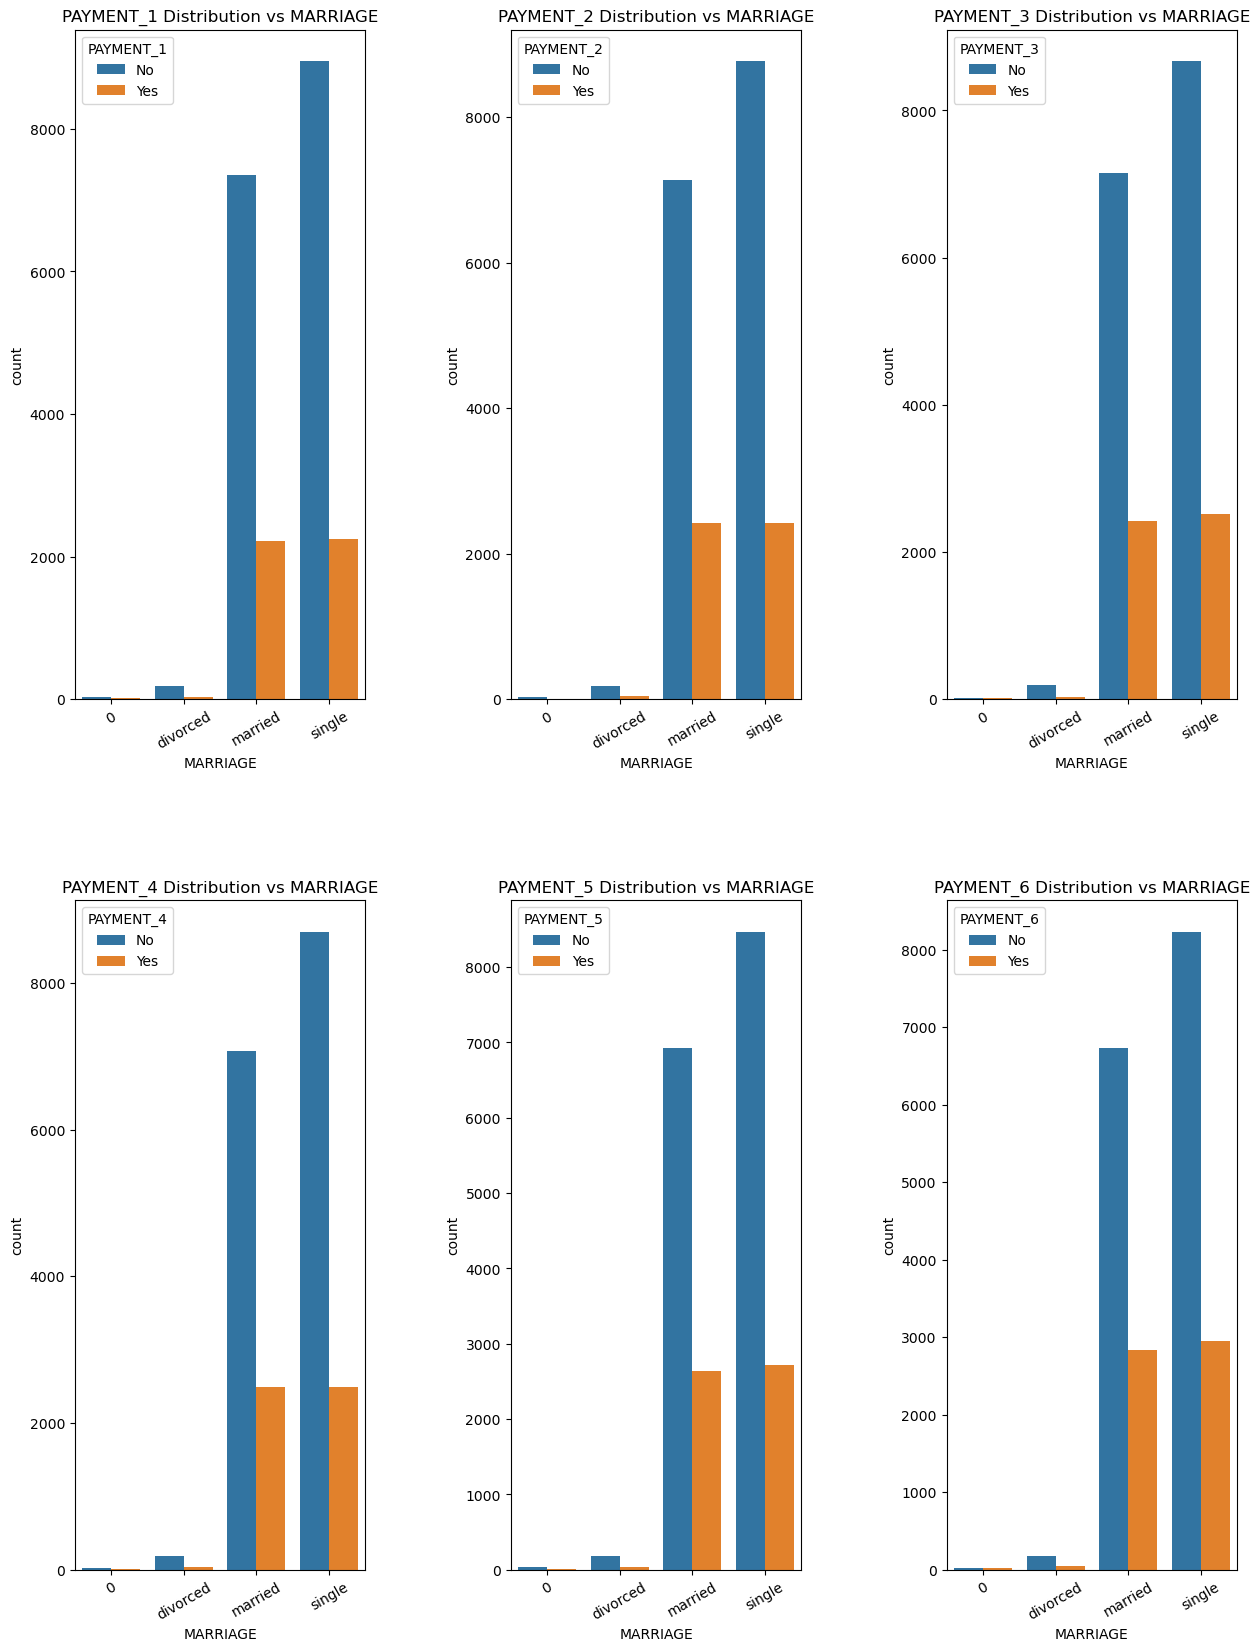

In [80]:
payment_default_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 20))

PAYMENT_1_count = datacopy.groupby(['PAYMENT_1','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_1_count, ax = axes[0,0], hue = 'PAYMENT_1')
axes[0,0].set_title('PAYMENT_1 Distribution vs MARRIAGE')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=30)

PAYMENT_2_count = datacopy.groupby(['PAYMENT_2','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_2_count, ax = axes[0,1], hue = 'PAYMENT_2')
axes[0,1].set_title('PAYMENT_2 Distribution vs MARRIAGE')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=30)

PAYMENT_3_count = datacopy.groupby(['PAYMENT_3','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_3_count, ax = axes[0,2], hue = 'PAYMENT_3')
axes[0,2].set_title('PAYMENT_3 Distribution vs MARRIAGE')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(),rotation=30)

PAYMENT_4_count = datacopy.groupby(['PAYMENT_4','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_4_count, ax = axes[1,0], hue = 'PAYMENT_4')
axes[1,0].set_title('PAYMENT_4 Distribution vs MARRIAGE')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=30)

PAYMENT_5_count = datacopy.groupby(['PAYMENT_5','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_5_count, ax = axes[1,1], hue = 'PAYMENT_5')
axes[1,1].set_title('PAYMENT_5 Distribution vs MARRIAGE')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=30)

PAYMENT_6_count = datacopy.groupby(['PAYMENT_6','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_6_count, ax = axes[1,2], hue = 'PAYMENT_6')
axes[1,2].set_title('PAYMENT_6 Distribution vs MARRIAGE')
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(),rotation=30)

payment_default_plot.subplots_adjust(wspace=0.5, hspace = 0.3)

##### Dari data grafik di atas, user dengan kelas single merupakan jumlah user terbanyak, tetapi banyak user tersebut yang tidak bisa membayar dengan jumlah yang seharusnya

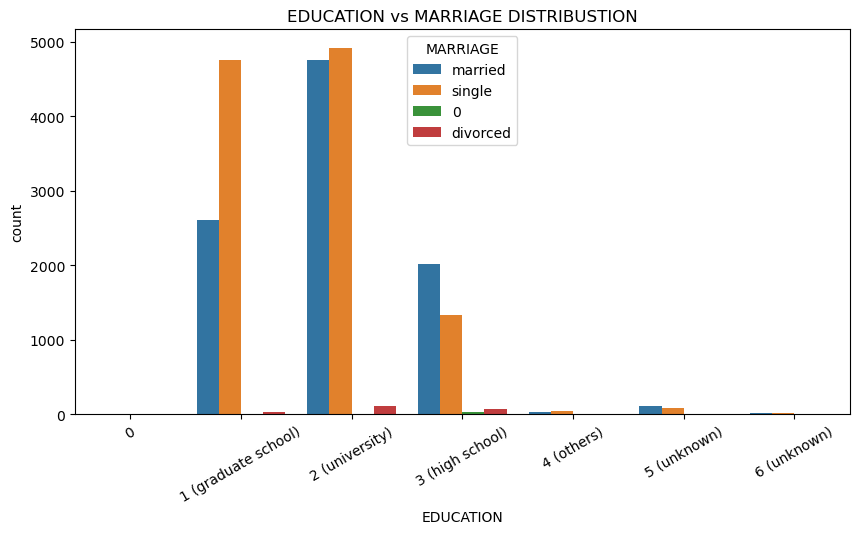

In [87]:
plt.figure(figsize=(10,5))
marriage_education_count = datacopy.groupby(['EDUCATION','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
ax = sns.barplot(x = 'EDUCATION', y = 'count', data = marriage_education_count, hue = 'MARRIAGE')
ax.set_title('EDUCATION vs MARRIAGE DISTRIBUSTION')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [ ]:
# Dari data di atas diketahui user terbanyak terdapat pada kelas pendidikan universitas dengan marital status single
# Dimana diketahui bahwa user yang single dengan status pendidikan university banyak yang tidak bisa melakukan pembayaran sesuai dengan tagihannya

## BUSINESS INSIGHTS

Dari EDA yang telah dilakukan, dapat ditarik beberapa insight yaitu:<br>
1. Default rate dari bank ini masih berada di angka 22%, dimana angka ini masih tergolong tinggi (Default rate ideal bagi suatu bank adalah di bawah 5%). Masalah ini tentu perlu segera ditangani agar bank tidak mengalami kerugian yang besar, baik kerugian finansial maupun turunnya reputasi bank di mata nasabah lain maupun investor.
2. User terbanyak yang tidak bisa membayar tagihan sesuai dengan jumlahnya pada bulan tertentu merupakan user yang masih single dengan pendidikan tingkat terakhir university. Karena hal ini, perlu ada nya tinjauan khusus kedepannya untuk terkait masalah ini

<br>
<b>BUSINESS RECOMMENDATION</b>
<br>
Dari beberapa insight tersebut, dapat diberikan rekomendasi kepada bank untuk membuat suatu model atau sistem yang dapat memprediksi apakah nasabah dapat membayar tagihan kartu kreditnya bulan depan. Dengan model ini, bank dapat memprediksi nasabah mana saja yang berpotensi untuk gagal bayar di bulan depan, sehingga bank dapat melakukan review lagi dan memberikan treatment khusus kepada nasabah tersebut seperti diberikan reminder khusus, membatasi kembali limit kartu kredit yang diberikan, atau bahkan menghentikan kartu kredit nasabah tersebut pada bulan selanjutnya.
